# Librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")

# Preparacion y organización de datos

In [2]:
# Carga del dataset proporcionado
df = pd.read_csv("household_energy_consumption.csv")

# Convertir fecha y asegurar tipos numéricos
df['Date'] = pd.to_datetime(df['Date'])

# Mostrar las primeras filas con estilo, como en tu notebook anterior
df.head().style.set_caption("Datos de Consumo de energia en viviendas (Primeras 5 muestras)") \
    .set_table_styles([{"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]}])


,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh
0,H00001,2025-04-01 00:00:00,8.400000,4,17.800000,No,3.200000
1,H00001,2025-04-02 00:00:00,7.900000,4,17.300000,No,2.800000
2,H00001,2025-04-03 00:00:00,9.200000,4,18.600000,No,3.000000
3,H00001,2025-04-04 00:00:00,7.900000,4,18.200000,No,2.700000
4,H00001,2025-04-05 00:00:00,9.600000,4,11.900000,No,3.200000


In [3]:
df = df.rename(columns={
    "Household_ID": "ID_Hogar",
    "Date": "Fecha",
    "Energy_Consumption_kWh": "Consumo_Energético_kWh",
    "Household_Size": "Numero_Personas",
    "Avg_Temperature_C": "Temperatura_Promedio_C",
    "Has_AC": "Aire_Acondicionado",
    "Peak_Hours_Usage_kWh": "Consumo_Horas_Pico_kWh"
})

In [4]:
df["Fecha"] = pd.to_datetime(df["Fecha"])
df = df.sort_values("Fecha") # ordenando por fecha

In [5]:
df_resumen = df.groupby("ID_Hogar").agg({
    "Consumo_Energético_kWh": ["mean", "max", "min"],
    "Consumo_Horas_Pico_kWh": "mean",
    "Temperatura_Promedio_C": "mean"
})
df_resumen # Resumen por vivienda

Consumo_Energético_kWh             Consumo_Horas_Pico_kWh  \
                           mean   max   min                   mean   
ID_Hogar                                                             
H00001                 8.514286   9.6   7.5               2.985714   
H00002                12.485714  14.7  11.1               4.500000   
H00003                 7.657143   9.1   6.4               2.685714   
H00004                17.971429  20.0  16.1               8.085714   
H00005                13.242857  15.3  12.0               4.414286   
...                         ...   ...   ...                    ...   
H12853                18.414286  20.0  16.3               7.985714   
H12854                14.457143  16.5  12.2               5.285714   
H12855                 7.514286   9.6   5.8               3.342857   
H12856                 8.642857  10.8   6.1               2.957143   
H12857                 5.175000   7.2   3.8               1.775000   

         Temperatura_Promedio_C  
                           mean  
ID_Hogar                         
H00001                16.742857  
H00002                18.257143  
H00003                16.828571  
H00004                16.942857  
H00005                18.000000  
...                         ...  
H12853                19.042857  
H12854                17.200000  
H12855                17.671429  
H12856                19.457143  
H12857                17.912500  

[12857 rows x 5 columns]

# Estadisticas básicas

In [6]:
df.describe()

,Fecha,Consumo_Energético_kWh,Numero_Personas,Temperatura_Promedio_C,Consumo_Horas_Pico_kWh
count,90000,90000.000000,90000.000000,90000.000000,90000.000000
mean,2025-04-04 00:00:03.840000,10.571988,3.487811,17.505802,4.319557
min,2025-04-01 00:00:00,0.500000,1.000000,10.000000,0.200000
25%,2025-04-02 00:00:00,6.000000,2.000000,15.800000,2.300000
50%,2025-04-04 00:00:00,10.400000,3.000000,17.500000,4.000000
75%,2025-04-06 00:00:00,14.800000,5.000000,19.200000,6.000000
max,2025-04-08 00:00:00,20.000000,6.000000,25.000000,10.000000
std,NaN,5.519494,1.709761,2.491621,2.531432


# Consumo energia por dia de la semana

In [7]:
df["Dia_Semana"] = df["Fecha"].dt.dayofweek
df["Dia_Semana"] = df["Dia_Semana"].map({
    0: "Lunes",
    1: "Martes",
    2: "Miércoles",
    3: "Jueves",
    4: "Viernes",
    5: "Sábado",
    6: "Domingo"
})

df_dia = df.groupby("Dia_Semana")["Consumo_Energético_kWh"].mean().reset_index()

orden = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

# Filtrar solo los días que realmente existen en tu dataset
orden_presentes = [d for d in orden if d in df_dia["Dia_Semana"].values]

df_dia = df_dia.set_index("Dia_Semana").loc[orden_presentes].reset_index()

df_dia.style.background_gradient(cmap="YlOrRd")


,Dia_Semana,Consumo_Energético_kWh
0,Lunes,10.574823
1,Martes,10.577547
2,Miércoles,10.576114
3,Jueves,10.566547
4,Viernes,10.580540
5,Sábado,10.571992
6,Domingo,10.556351


# Consumo total de energia por tamaño de vivienda y por persona

In [8]:
df_size = df.groupby("Numero_Personas").agg({
    "Consumo_Energético_kWh": "mean"
}).reset_index()

df_size["Consumo_por_Persona"] = (
    df_size["Consumo_Energético_kWh"] / df_size["Numero_Personas"]
)

In [9]:
(df_size.style
 .background_gradient(subset=["Consumo_Energético_kWh"], cmap="YlOrRd")
 .background_gradient(subset=["Consumo_por_Persona"], cmap="YlGn")
 .set_caption("Consumo por Tamaño del Hogar")
 .set_table_styles([
     {'selector': 'th.row_heading', 'props': [('display', 'none')]},
     {'selector': 'th.blank', 'props': [('display', 'none')]}
 ])
)

,Numero_Personas,Consumo_Energético_kWh,Consumo_por_Persona
0,1,3.291343,3.291343
1,2,6.226837,3.113418
2,3,9.177851,3.059284
3,4,12.249731,3.062433
4,5,15.215470,3.043094
5,6,17.471067,2.911844


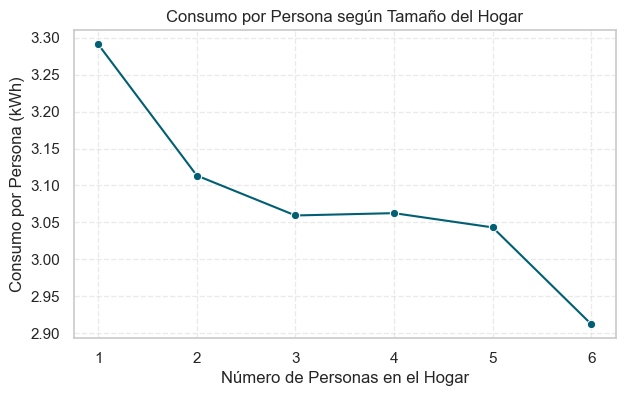

In [10]:
plt.figure(figsize=(7,4))
sns.lineplot(
    data=df_size,
    x="Numero_Personas",
    y="Consumo_por_Persona",
    marker="o",
    color="#005F73"
)

plt.title("Consumo por Persona según Tamaño del Hogar")
plt.xlabel("Número de Personas en el Hogar")
plt.ylabel("Consumo por Persona (kWh)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

# Consumo de eneriga en viviendas con y sin aire acondicionado

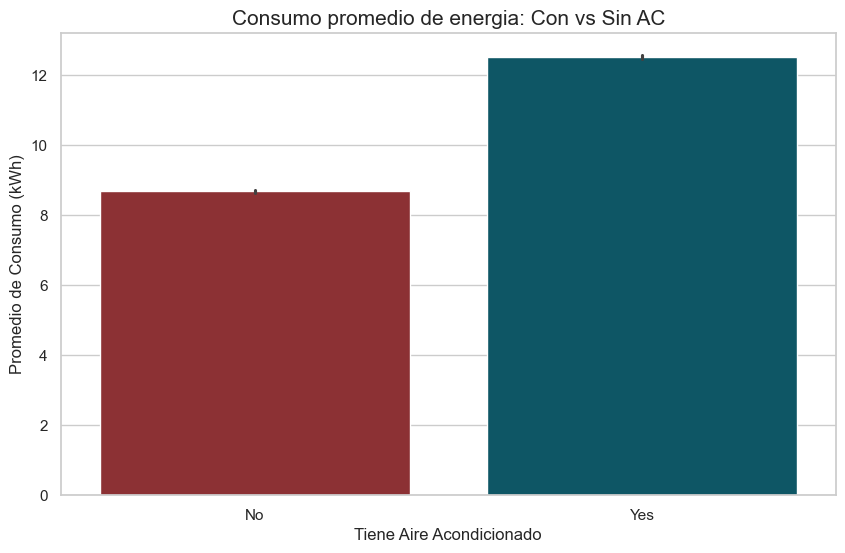

In [11]:
colores = {
    "Yes": "#005F73",   # verde petróleo
    "No": "#9B2226"     # rojo corporativo
}

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="Aire_Acondicionado",
    y="Consumo_Energético_kWh",
    palette=colores
)

plt.title('Consumo promedio de energia: Con vs Sin AC', fontsize=15)
plt.ylabel('Promedio de Consumo (kWh)')
plt.xlabel('Tiene Aire Acondicionado')
plt.show()